In [92]:
from CNN import tCNN

### Getting Data

In [93]:
import pickle
with open('Data_simple.pkl', 'rb') as f:
    Final = pickle.load(f)
    
X = Final[0]
Y = Final[1]

### Random Shuffle

In [94]:
import random

XY = list(zip(X, Y))
random.shuffle(XY)

X, Y = zip(*XY)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 10, 10, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_25 (ZeroPadding2 (None, 14, 14, 1)    0           input_9[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_26 (ZeroPadding2 (None, 14, 14, 1)    0           input_9[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_27 (ZeroPadding2 (None, 14, 14, 1)    0           input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_25 

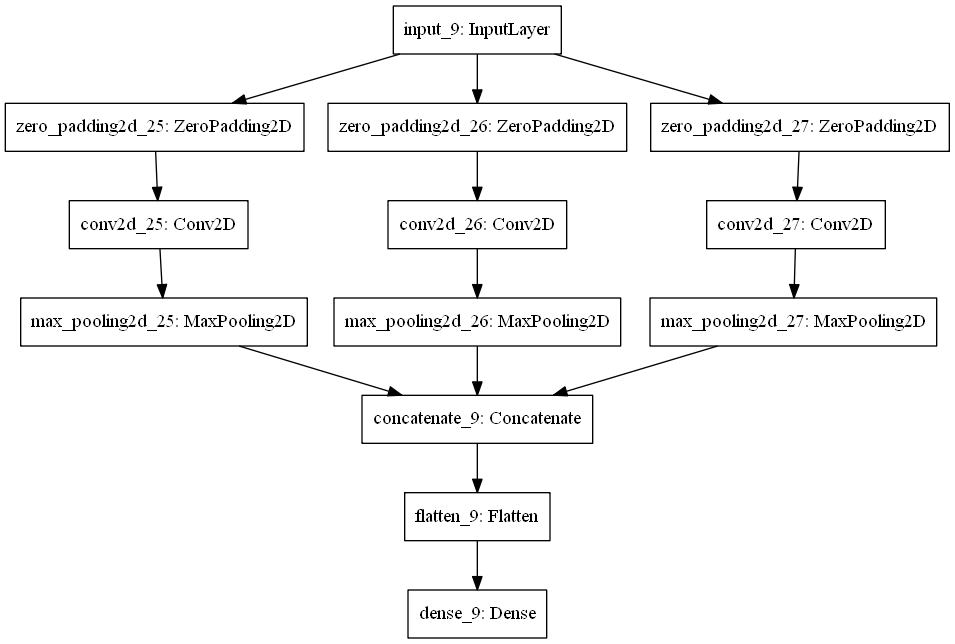

In [95]:
tCNN()


from keras.utils import plot_model
from IPython.display import Image
from keras.models import load_model

model = load_model('CNN_model_init.h5')
plot_model(model, to_file='CNN_arch.png')
Image(filename='./CNN_arch.png')

## Reshaping array

In [96]:
import numpy as np

X = np.asarray(X)
Y = np.asarray(Y)

X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
Y = Y.reshape(Y.shape[0], 1)

print(f"X shape : {X.shape}\nY shape : {Y.shape}")

X shape : (169, 10, 10, 1)
Y shape : (169, 1)


In [97]:
x_train = X[0:140]
y_train = Y[0:140]

x_test = X[140:]
y_test = Y[140:]

### Training Model

In [98]:
# callback function
import keras
import matplotlib.pyplot as plt

class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

history = model.fit(x_train, y_train,
          epochs=1000,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[callback])

try:
    model.save('CNN_model_final.h5')
    print("Model Saved!")
except:
    print("Error in saving Model")

Train on 140 samples, validate on 29 samples
Epoch 1/1000
140/140 [==============================] - 2s 17ms/step - loss: 1.9831 - acc: 0.2357 - val_loss: 1.8925 - val_acc: 0.3448
Epoch 2/1000
140/140 [==============================] - 0s 1ms/step - loss: 1.5994 - acc: 0.4714 - val_loss: 1.6547 - val_acc: 0.5862
Epoch 3/1000
140/140 [==============================] - 0s 771us/step - loss: 1.2735 - acc: 0.7929 - val_loss: 1.4532 - val_acc: 0.8966
Epoch 4/1000
140/140 [==============================] - 0s 927us/step - loss: 1.0823 - acc: 0.9571 - val_loss: 1.2167 - val_acc: 0.8966

Reached 90% accuracy so cancelling training!
Model Saved!


## Plotting Model Accuracy and Loss

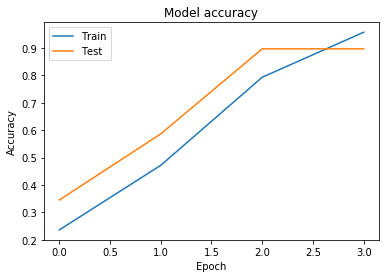

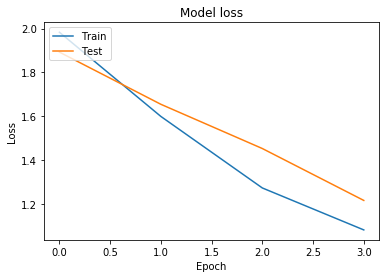

In [99]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Model_accuracy.png', bbox_inches='tight')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Model_loss.png', bbox_inches='tight')

In [100]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[1.2166534662246704, 0.8965517282485962]

In [101]:
classes = model.predict(x_test)
print(classes)

[[1.66687340e-01 8.55415761e-02 1.44482832e-02 3.55084538e-01
  5.95456548e-02 1.59705102e-01 8.58507529e-02 7.31367320e-02]
 [2.05612838e-01 9.94629487e-02 2.33658291e-02 1.49478063e-01
  9.08258930e-02 1.38332680e-01 1.56005457e-01 1.36916369e-01]
 [9.54417288e-02 1.13488592e-01 1.72668770e-02 1.71613738e-01
  8.28873813e-02 3.10880125e-01 8.85425881e-02 1.19878896e-01]
 [3.49467546e-01 1.37010768e-01 1.37404287e-02 1.76963344e-01
  5.45190684e-02 1.12393811e-01 8.10525268e-02 7.48524442e-02]
 [1.14804655e-01 5.77532411e-01 4.17320011e-03 7.90878907e-02
  3.38891149e-02 9.67834517e-02 5.81154712e-02 3.56137529e-02]
 [1.55865997e-01 1.04832016e-01 9.59590171e-03 1.48614973e-01
  5.31921312e-02 3.50038797e-01 7.58784637e-02 1.01981774e-01]
 [3.28320682e-01 1.27571195e-01 1.96281858e-02 1.42171949e-01
  7.49296397e-02 9.95130837e-02 1.07355997e-01 1.00509197e-01]
 [1.53955624e-01 1.02858298e-01 1.76490322e-02 1.88201606e-01
  6.72812685e-02 2.67116845e-01 1.15795188e-01 8.71420950e-02]


In [102]:
classes.shape

(29, 8)

In [103]:
x_test.shape

(29, 10, 10, 1)

In [104]:
y_test[0]

array([3])